# JSON OUTPUTS ANALYZER

In [36]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('HRpose_danaLab_depth_simLab_depth.json') as json_file:
    outputs = json.load(json_file)
    

In [6]:
preds_ori = outputs['preds_ori'] #est-ce-que les données sont toutes arrondies ??
joints_ori = outputs['joints_ori'] #est-ce que c'est des pixels? des cm ? mm? Lama pense que c'est des coordonées locales dans un repère associé à l'image
# ca expliquerait pourquoi on normaliserait 
l_std_ori_all = outputs['l_std_ori_all'] #longueure du segment thorax tete ? 
err_nmd = outputs['err_nmd'] #error normalised
pck = outputs['pck']

normaliser par un segment serait biaisé ? Il y a forcément de la variabilité ? si on prend la moyenne sur tous les patients ? 
est-ce que ca serait la taille de la tete de chaque patient ? ou plutto de tous les segments de chaque patients? oui cest ca. 
il irait prendre

In [70]:
joints_ori[0] #pourquoi est-ce que ces valeurs sont des floats et pas des entiers (ca devrait représenter des coordonées de pixels)

[[45.93952178955078, 118.0008544921875],
 [45.93952178955078, 95.9224853515625],
 [45.394378662109375, 74.11669158935547],
 [60.11328887939453, 73.29898071289062],
 [58.47785186767578, 96.19506072998047],
 [59.02299880981445, 117.72827911376953],
 [45.93952178955078, 61.03321838378906],
 [36.672061920166016, 53.94633865356445],
 [41.85093688964844, 38.954856872558594],
 [63.65673065185547, 37.59199142456055],
 [69.38075256347656, 51.220611572265625],
 [57.38756561279297, 60.488075256347656],
 [51.93611526489258, 37.04684829711914],
 [51.39097213745117, 22.60051155090332]]

In [68]:
x = np.array(joints_ori[1])
np.linalg.norm(x[13, :] - x[12, :])

15.01376666746408

In [69]:
l_std_ori_all[1]

15.01376724243164

In [32]:
joints_ori_test = np.array(joints_ori[0])
preds_ori_test = np.array(preds_ori[0])
print(np.sqrt(sum((joints_ori_test - preds_ori_test)**2,0)))
print(np.shape(preds_ori))
print(np.shape(joints_ori))
print(np.shape(l_std_ori_all))
print(np.shape(err_nmd))
print(np.shape(pck))

[11.85507006 13.5891919 ]
(945, 14, 2)
(945, 14, 2)
(945,)
(945, 14)
(15, 11)


In [33]:
pck

[[0.0,
  15.238095819950104,
  41.16401970386505,
  67.61904954910278,
  80.95238208770752,
  88.46560716629028,
  92.27513074874878,
  94.17989253997803,
  94.81481313705444,
  95.66137790679932,
  96.61375880241394],
 [0.0,
  12.486772239208221,
  37.98941671848297,
  61.58730387687683,
  77.56613492965698,
  87.40741014480591,
  91.64021015167236,
  94.60317492485046,
  96.40211462974548,
  97.77777791023254,
  98.30687642097473],
 [0.0,
  8.783068507909775,
  27.08994746208191,
  49.62962865829468,
  64.33862447738647,
  79.47089672088623,
  86.45502924919128,
  89.52381014823914,
  92.9100513458252,
  95.55555582046509,
  96.93121910095215],
 [0.0,
  8.994708955287933,
  27.724868059158325,
  48.99470806121826,
  67.19576716423035,
  79.36508059501648,
  87.30158805847168,
  90.79365134239197,
  93.01587343215942,
  95.13227343559265,
  97.0370352268219],
 [0.0,
  9.100528806447983,
  31.216931343078613,
  59.470897912979126,
  78.09523940086365,
  86.87830567359924,
  90.58201313

# Depth

Text(0.5, 1.0, 'Train: danaLab/depth \n Test: simLab/depth')

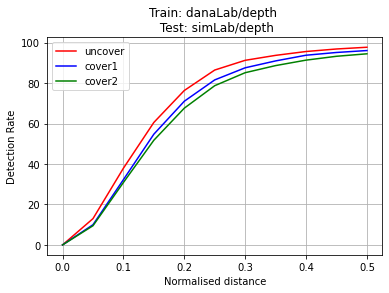

In [48]:
cov_li = ['uncover', 'cover1', 'cover2']
colors = ['r', 'b', 'g']
fig = plt.plot()
ticks = np.linspace(0,0.5,11) #ticks used in main

for i, cov in enumerate(cov_li):
    json_path = 'HRpose_danaLab_depth_simLab_depth_'+ cov +'.json'
    
    with open(json_path) as json_file:
        outputs = json.load(json_file)
        
    preds_ori = outputs['preds_ori']
    joints_ori = outputs['joints_ori']
    l_std_ori_all = outputs['l_std_ori_all']
    err_nmd = outputs['err_nmd']
    pck = outputs['pck']
    
    global_pck = pck[-1]
    
    plt.plot(ticks, global_pck, color=colors[i], label = cov)

plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Normalised distance')
plt.ylabel('Detection Rate')
plt.title('Train: danaLab/depth \n Test: simLab/depth')

# IR

Text(0.5, 1.0, 'Train: danaLab/IR \n Test: simLab/IR')

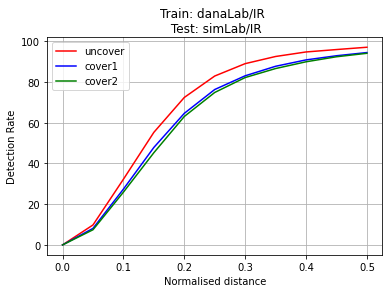

In [49]:
cov_li = ['uncover', 'cover1', 'cover2']
colors = ['r', 'b', 'g']
fig = plt.plot()
ticks = np.linspace(0,0.5,11) #ticks used in main

for i, cov in enumerate(cov_li):
    json_path = 'HRpose_danaLab_IR_simLab_IR_'+ cov +'.json'
    
    with open(json_path) as json_file:
        outputs = json.load(json_file)
        
    preds_ori = outputs['preds_ori']
    joints_ori = outputs['joints_ori']
    l_std_ori_all = outputs['l_std_ori_all']
    err_nmd = outputs['err_nmd']
    pck = outputs['pck']
    
    global_pck = pck[-1]
    
    plt.plot(ticks, global_pck, color=colors[i], label = cov)

plt.grid()    
plt.legend(loc = 'best')
plt.xlabel('Normalised distance')
plt.ylabel('Detection Rate')
plt.title('Train: danaLab/IR \n Test: simLab/IR')

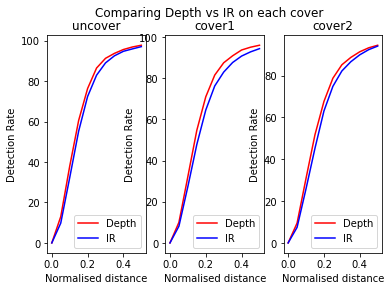

In [53]:
cov_li = ['uncover', 'cover1', 'cover2']
colors = ['r', 'b', 'g']
fig, axs = plt.subplots(1, 3)
fig.suptitle('Comparing Depth vs IR on each cover')

ticks = np.linspace(0,0.5,11) #ticks used in main

for i, cov in enumerate(cov_li):
    ax = axs[i]
    json_path_IR = 'HRpose_danaLab_IR_simLab_IR_'+ cov +'.json'
    json_path_depth = 'HRpose_danaLab_depth_simLab_depth_'+ cov +'.json'
    
    with open(json_path_IR) as json_file:
        outputs_IR = json.load(json_file)
    with open(json_path_depth) as json_file:
        outputs_depth = json.load(json_file)
        
#     preds_ori = outputs['preds_ori']
#     joints_ori = outputs['joints_ori']
#     l_std_ori_all = outputs['l_std_ori_all']
#     err_nmd = outputs['err_nmd']

    pck_depth = outputs_depth['pck']
    pck_IR = outputs_IR['pck']
    
    global_pck_depth = pck_depth[-1]
    global_pck_IR = pck_IR[-1]
    
    ax.plot(ticks, global_pck_depth, color='r', label = 'Depth')
    ax.plot(ticks, global_pck_IR, color='b', label = 'IR')
    ax.set_title(cov)
    ax.legend(loc = 'best')
    ax.set(xlabel='Normalised distance',  ylabel = 'Detection Rate')

# plt.grid()    
# plt.legend(loc = 'best')
# plt.xlabel('Normalised distance')
# plt.ylabel('Detection Rate')
# plt.title('Train: danaLab/IR \n Test: simLab/IR')